### Miles Tweed
#### On my honor, I have neither given nor recieved help from anyone during this exam.
-Miles Tweed

### Import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [2]:
class ProgTimer():
    
    def __init__(self, func):
        self.func = func
    
    def progTimer(self, *args):
        from time import time
        from tqdm import tqdm
        RTs = []
        for i in tqdm(range(100000)):
            start_time = time()
            self.func(*args)
            stop_time = time()
            RTs.append(stop_time-start_time)
        return (sum(RTs)/100000)*10e3

## Question 1
### a 

In [3]:
X = np.linspace(0,100)

In [4]:
f = [np.log(4*x**2 + 10) for x in X]

In [5]:
g = [2*x + 7 for x in X]

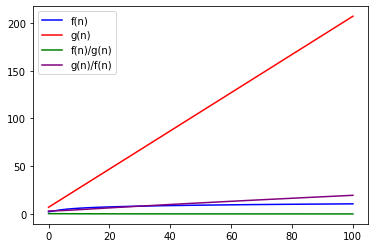

In [6]:
plt.plot(X,f, color = 'blue', label = 'f(n)')
plt.plot(X,g, color = 'red', label = 'g(n)')
plt.plot(X,[f[x]/g[x] for x in range(len(f))], color = 'green', label = 'f(n)/g(n)')
plt.plot(X,[g[x]/f[x] for x in range(len(f))], color = 'purple', label = 'g(n)/f(n)')
plt.legend()

### b

For all $n > N \rightarrow f(n) < g(n)$ and the ratio of $\frac{f(n)}{g(n)}$ goes to zero as $n \rightarrow \infty$

### c

In [7]:
f2 = [np.sqrt(4*x**2 + 10) for x in X]

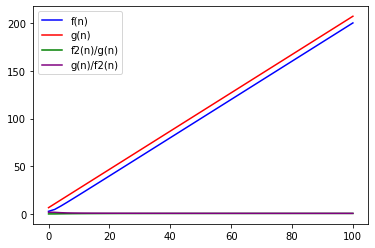

In [8]:
plt.plot(X,f2, color = 'blue', label = 'f(n)')
plt.plot(X,g, color = 'red', label = 'g(n)')
plt.plot(X,[f2[x]/g[x] for x in range(len(f))], color = 'green', label = 'f2(n)/g(n)')
plt.plot(X,[g[x]/f2[x] for x in range(len(f))], color = 'purple', label = 'g(n)/f2(n)')
plt.legend()

In this case both $f(n)$ and $g(n)$ are on the order of $\theta(n)$.  This can be seen by simplifying $f(n)$ to $f(n) = 2n\sqrt{1+\frac{1}{2n} + \frac{5}{n^2}}$.  Now the ratio of $\frac{f(n)}{g(n)}$ becomes $\frac{(1+\frac{7}{2n})}{\sqrt{1+\frac{1}{2n} + \frac{5}{n^2}}}$ which is bounded by one as $n \rightarrow \infty$. $\therefore f(n) = O(g(n)) = \theta(n)$

## Question 2
### a

i. $O(n^2)$ for insertion sort because this iterative algorithm uses nested for loops and would have to run over the entire list for every value in the list to make all of the required comparisons

ii. Merge-sort is a recursive alsorithm that has a worse case runtime of $O(n\log_2(n))$. The recusion splits the list in half everytime in a total of$\log_2(n)$ steps while the combination step compares every base case in a total of $n$ steps.

iii. Quicksort has a worse case runtime of $O(n^2)$ if the list is highly skewed. This is because if the pivots are allways the largest numbers all of the sublist will be only one less that the previous one.

iv. Heap-sort has a worse case runtime of $O(n\log_2(n))$ because, no matter what, create_max_heap only need to run $\log_2(n)$ times while the compination step always runsin $n$ steps

### b

In [9]:
random.seed(1234)
A = [random.randint(1,10e6) for x in range(100)]

A = sorted(A)

if len(A)%2 == 1:
    med = A[math.floor(len(A)/2)]
else:
    med = (A[math.floor(len(A)/2)] + A[math.floor(len(A)/2-1)])/2

In [37]:
print("input:\n",A)

input:
 [96977, 125687, 245263, 265759, 292395, 323793, 455144, 516974, 585964, 664204, 674524, 688920, 760500, 771171, 908910, 1058268, 1083176, 1150402, 1184276, 1263689, 1278994, 1408250, 1491979, 1520748, 1531546, 1651248, 1860408, 1919532, 1960427, 2078306, 2369409, 2412034, 2420042, 2492334, 2592943, 2593263, 2751518, 2803682, 2851647, 2975323, 3071752, 3114219, 3355984, 3608686, 3973009, 4180079, 4191420, 4470361, 4522895, 4557885, 4614423, 4643660, 4960670, 5037742, 5073918, 5123640, 5595371, 5732906, 5806410, 5808790, 5865186, 5949799, 5959924, 6330840, 6479085, 6983530, 6984771, 7315870, 7346274, 7375204, 7394267, 7606589, 7619234, 7777045, 7793051, 7816481, 7853737, 7899387, 7932720, 7984863, 8070452, 8124299, 8166336, 8319096, 8331258, 8440344, 8524536, 8641021, 8710943, 8886610, 8894630, 9077954, 9335390, 9350450, 9447354, 9714054, 9768158, 9778782, 9857093, 9981038]


In [39]:
print("output:\n",med)

output:
 4586154.0


### c

In [12]:
def alg():
    random.seed(1234)
    A = [random.randint(1,10e6) for x in range(100)]

    A = sorted(A)

    if len(A)%2 == 1:
        med = A[math.floor(len(A)/2)]
    else:
        med = (A[math.floor(len(A)/2)] + A[math.floor(len(A)/2-1)])/2

In [13]:
timer = ProgTimer(alg)

In [14]:
timer.progTimer() # returns time in ms

100%|██████████| 100000/100000 [00:06<00:00, 15451.22it/s]


0.6414793968200684

### d

In [15]:
lists = [[random.randint(1,10e6) for x in range(100)] for x in range(10)]
def alg2(A):

    A = sorted(A)

    if len(A)%2 == 1:
        med = A[math.floor(len(A)/2)]
    else:
        med = (A[math.floor(len(A)/2)] + A[math.floor(len(A)/2-1)])/2

In [28]:
runtimesD = []
timer2 = ProgTimer(alg2)
for i in range(10):
    runtimesD.append((timer2.progTimer(lists[i])))

100%|██████████| 100000/100000 [00:00<00:00, 408744.19it/s]


In [29]:
runtimesD

[0.0208066463470459,
 0.02076714038848877,
 0.020861434936523437,
 0.02104651927947998,
 0.0207474946975708,
 0.021921801567077636,
 0.02103705406188965,
 0.021711802482604983,
 0.020734381675720216,
 0.021680498123168947]

(0.0, 0.1)

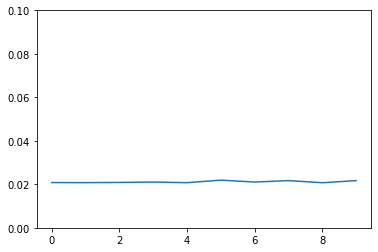

In [33]:
plt.plot(range(10),runtimesD)
plt.ylim(0,0.1)

### e

In [22]:
lists2 = [[random.randint(1,10e6) for x in range(y)] for y in [100,200,300,400,500,600,700,800,900,1000]]

In [25]:
runtimesE = []
for i in range(len(lists2)):
    runtimesE.append(timer2.progTimer(lists2[i]))

100%|██████████| 100000/100000 [00:05<00:00, 17916.50it/s]


In [27]:
runtimesE

[0.02128114700317383,
 0.039151573181152345,
 0.07538883686065674,
 0.13756418228149414,
 0.20263433456420898,
 0.26737165451049805,
 0.3334830045700073,
 0.4140043497085571,
 0.4797541379928589,
 0.552318000793457]

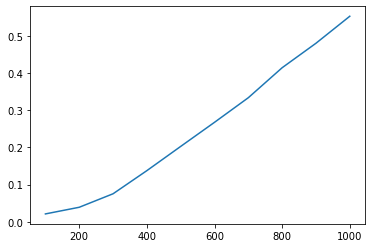

In [36]:
plt.plot([100,200,300,400,500,600,700,800,900,1000],runtimesE)

### F

The alteration in part E can be used to eliminate insertion sort because we would expect to see quadratic growth with this type of test and we do not. This is because insertion sort has a quadratic runtime on average. However we could not use this test to eliminate Quicksort because the average runtime for Quicksort is the same as for Mergesort

## Question 3
### 1.a

```
INPUT = A,N
FOR i IN RANGE A.LENGTH DO
     IF A[i] EQUALS N DO
         RETURN TRUE
     END IF
```

### 1.b
```
FIND(INPUT = A,N)
    IF A EQUALS N DO
        RETURN TRUE
    ELSE DO
        i EQUALS FLOOR(A.LENGTH/2)
        RETURN FIND(A[0:i-1],N)
        RETURN FIND(A[i:n],N)
```

### 1.c

The algorithm in 1.a has a worse case runtime of $O(n)$ because if the item is at the end of the list the algorithm has to iterate over the entire list

The algorithm in 1.b had a runtime of $O(log(n))$ because it divides and conquers by splitting the list in half at every recusion.

### 2.a

The brute force solution would be to calculate the sum of every combinations of items in the list. Since this list would have $n!$ permutation of the items in the list, The runtime would be on order $\theta(n!)$

### 2.b

Yes this would be a candidate for dynamic programming.  This is because it is a question that involves subsets of a list which are an optimal substructure. Additionally the subproblems would all be of the same sort, namely a calculation of the sum of a subset.